# Example notebook showing pipeline for schizophrenia analysis

In [1]:
# quick/dirty method to allow importing
import os
os.chdir("../")
os.getcwd()

'/home/eerdem/CELLECT-revised'

In [2]:
import pandas as pd
import constants
from scripts import convert_output_to_dataframe
from scripts import gene_set_enrichment_analysis
from scripts import calculate_beta_correlation
from scripts import calculate_es_correlation
from scripts import upsetplot

## Find Significant Cell-Types

In [3]:
# type of pval correction (can be modified in the constants.py file)
print(constants.PVAL_CORRECTION)

bonferroni


In [4]:
# After running CELLECT with the GWAS and scRNA files the output
# will be stored in out/CELLECT-{GWAS_name} folder
cellect_out_dir = "out/CELLECT-SCZ_PGC3_2020"
gwas_name = 'SCZ_PGC3_2020'

df_scz = convert_output_to_dataframe.make_df(cellect_out_dir)
df_scz = convert_output_to_dataframe.pvalue_correction(df_scz, method=constants.PVAL_CORRECTION)
display(df_scz)

,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
0,SCZ_PGC3_2020,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,-0.017441,0.122443,0.556633,H-MAGMA,3,1.0
1,SCZ_PGC3_2020,Allen_human_LGN,GABAergic.LGN_Inh_LAMP5,-0.129795,0.098972,0.905128,H-MAGMA,3,1.0
2,SCZ_PGC3_2020,Allen_human_LGN,GABAergic.LGN_Inh_NTRK1,0.052677,0.121780,0.332673,H-MAGMA,3,1.0
3,SCZ_PGC3_2020,Allen_human_LGN,GABAergic.LGN_Inh_TRPC4,-0.308010,0.136322,0.988061,H-MAGMA,3,1.0
4,SCZ_PGC3_2020,Allen_human_LGN,Glutamatergic.LGN_Exc_BTNL9,-0.126593,0.182346,0.756227,H-MAGMA,3,1.0
...,...,...,...,...,...,...,...,...,...
1576,SCZ_PGC3_2020,tabula_muris,Tongue.keratinocyte,-0.178351,0.069668,0.994761,MAGMA,3,1.0
1577,SCZ_PGC3_2020,tabula_muris,Trachea.blood_cell,-0.288160,0.090981,0.999229,MAGMA,3,1.0
1578,SCZ_PGC3_2020,tabula_muris,Trachea.endothelial_cell,-0.117255,0.085372,0.915182,MAGMA,3,1.0
1579,SCZ_PGC3_2020,tabula_muris,Trachea.epithelial_cell,-0.346570,0.080956,0.999991,MAGMA,3,1.0


In [5]:
# show significant cell-types
significant_counts = df_scz[
    (df_scz[f'pvalue_{constants.PVAL_CORRECTION}']<=0.05) # get only significant hits
].value_counts(['specificity_id','annotation'])

significant_celltypes = significant_counts[
    (significant_counts>=len(constants.METHODS)-1) # significant in >2 methods
].index.tolist() 

significant_celltypes = [f'{d}, {c}' for d,c in significant_celltypes]
display(significant_celltypes)

['mousebrain, TEINH11',
 'mousebrain, TEGLU18',
 'mousebrain, HBGLU7',
 'mousebrain, TEINH13',
 'mousebrain, TEINH12',
 'mousebrain, TEGLU15',
 'mousebrain, MEINH2',
 'mousebrain, TEINH1',
 'mousebrain, TEGLU9',
 'mousebrain, TEGLU8',
 'mousebrain, TEGLU7',
 'mousebrain, HBINH5',
 'mousebrain, TEGLU5',
 'mousebrain, TEGLU4',
 'mousebrain, TEGLU3',
 'mousebrain, TEGLU24',
 'mousebrain, TEGLU23',
 'mousebrain, MEGLU6',
 'mousebrain, TEGLU17',
 'mousebrain, TEGLU20',
 'mousebrain, TEGLU2',
 'mousebrain, HBGLU6',
 'mousebrain, TEINH16',
 'mousebrain, HBGLU5',
 'mousebrain, TEINH18',
 'Allen_human_MTG, Glutamatergic.Exc_L2_LAMP5_LTK',
 'DroNc_Human_Hippocampus, exCA1',
 'mousebrain, TEGLU10',
 'DroNc_Human_Hippocampus, exPFC1',
 'DroNc_Human_Hippocampus, exPFC2',
 'PsychENCODE_DER-22, Ex1',
 'tabula_muris, Brain_Non-Myeloid.oligodendrocyte_precursor_cell',
 'mousebrain, TEGLU11',
 'tabula_muris, Brain_Non-Myeloid.neuron',
 'mousebrain, DEGLU1',
 'mousebrain, DEGLU2',
 'mousebrain, TEGLU13',

In [6]:
# let's compare which enriched cell-types in scz are also enriched in other gwas (groups) using the upsetplot
# first we load the pre-computed data
df_all = pd.read_hdf('data/CELLECT_output/data.h5', 'df_all')

display(df_all)

,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
0,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,-0.174645,0.089013,0.975106,H-MAGMA,3,1.0
1,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_LAMP5,-0.123540,0.071732,0.957472,H-MAGMA,3,1.0
2,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_NTRK1,-0.269440,0.088436,0.998840,H-MAGMA,3,1.0
3,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_TRPC4,-0.246886,0.099982,0.993223,H-MAGMA,3,1.0
4,AD_JANSENS2019,Allen_human_LGN,Glutamatergic.LGN_Exc_BTNL9,-0.421298,0.133637,0.999188,H-MAGMA,3,1.0
...,...,...,...,...,...,...,...,...,...
879625,volume: thalamus,tabula_muris,Tongue.keratinocyte,-0.035636,0.045386,0.783817,MAGMA,3,1.0
879626,volume: thalamus,tabula_muris,Trachea.blood_cell,-0.102483,0.059198,0.958279,MAGMA,3,1.0
879627,volume: thalamus,tabula_muris,Trachea.endothelial_cell,-0.114722,0.055573,0.980498,MAGMA,3,1.0
879628,volume: thalamus,tabula_muris,Trachea.epithelial_cell,-0.102770,0.052743,0.974312,MAGMA,3,1.0


In [7]:
# in this data, we have 3 main groups 
# which can be found described in the constants.GWAS_GROUP_DICT
display(constants.GWAS_GROUP_DICT)
# GWAS group name : [(regex) keywords used to match to gwas]

{'Structural MRI': ['volume', 'thickness', 'area'],
 'DTI Tracts': ['DTI'],
 'rs-fMRI Network': ['Net']}

In [8]:
# let's also include scz to this group (or edit the constants.py file directly)
gwas_group_dict = constants.GWAS_GROUP_DICT.copy()
gwas_group_dict['Schizophrenia'] = ['SCZ_PGC3']
display(gwas_group_dict)

{'Structural MRI': ['volume', 'thickness', 'area'],
 'DTI Tracts': ['DTI'],
 'rs-fMRI Network': ['Net'],
 'Schizophrenia': ['SCZ_PGC3']}

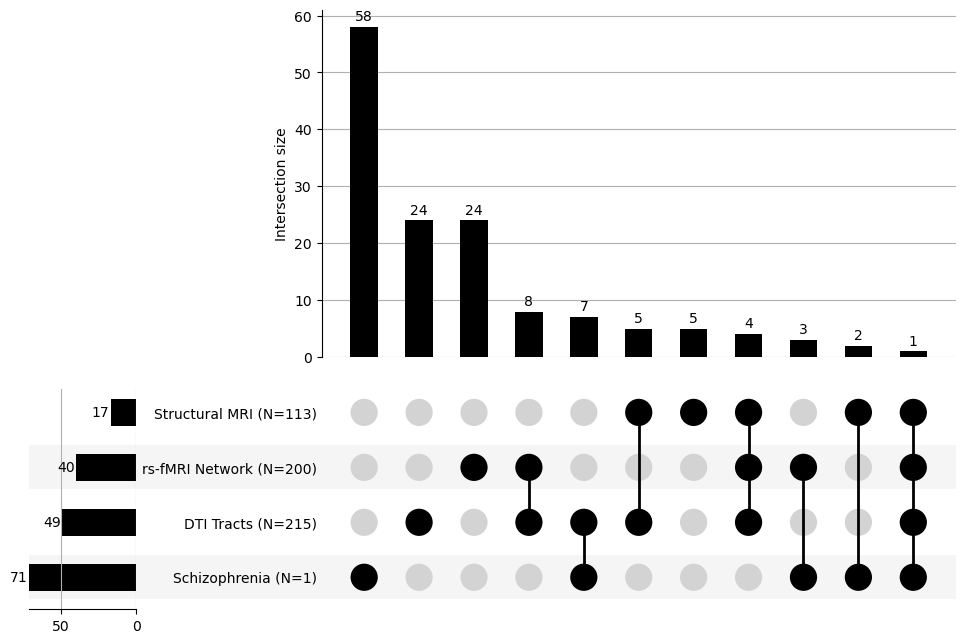

In [15]:
# now to plot the upsetplot
upsetplot.plot_upset(df_all, gwas_group_dict,
                     sign_threshold=len(constants.METHODS)-1,
                     element_size=56,
                     save=False)

In [10]:
# and get dataframe (or excel file) of the specific cell-types
upsetplot.get_shared_celltypes(df_all, gwas_group_dict,
                               sign_threshold=len(constants.METHODS)-1,
                               save_to_excel=False)

,specificity_id,annotation,group,gwas
20,Descartes_Human_Cerebrum,Cerebrum-Excitatory_neurons,"Structural MRI, Schizophrenia, rs-fMRI Network...","DTI PC1: IFO, Net100_Pair18_48, DTI AD: IFO, N..."
34,DroNc_Human_Hippocampus,exCA3,"Structural MRI, rs-fMRI Network, DTI Tracts",cortical thickness (adjusted): Occipital.peric...
42,GSE67835_Human_Cortex,endothelial,"Structural MRI, rs-fMRI Network, DTI Tracts","Net25_Node7, DTI MD: RLIC, DTI RD: SS, Net100_..."
43,GSE67835_Human_Cortex,fetal_quiescent,"Structural MRI, rs-fMRI Network, DTI Tracts","DTI RD: IFO, DTI PC1: IFO, cortical thickness ..."
46,GSE67835_Human_Cortex,oligodendrocytes,"Structural MRI, rs-fMRI Network, DTI Tracts","DTI MD: CGH, volume: Cingulate.rostralanterior..."
...,...,...,...,...
83,mousebrain,SCINH5,rs-fMRI Network,Net100_Pair32_38
120,tabula_muris,Brain_Non-Myeloid.brain_pericyte,rs-fMRI Network,"Net25_Node3, Net100_Node48, Net100_Node44, Net..."
126,tabula_muris,Heart.myofibroblast_cell,rs-fMRI Network,"Net100_Node32, Net25_Node10, Net25_Node12, Net..."
127,tabula_muris,Heart.smooth_muscle_cell,rs-fMRI Network,"Net100_Node48, Net100_Node17, Net25_Node12, Ne..."


## Gene-Set Enrichment Analysis

In [ ]:
# gene-sets used in the analysis (can be modified in the constants.py file)
for gene_set in constants.GENE_SET_LIST:
    print(gene_set)

In [ ]:
gwas_group_dict = {'schizophrenia':['SCZ']} # GWAS group name : [(regex) keywords]
# the GWAS group name is just used for printing to stdout and can be anything
# the keywords are used to find all gwas in the dataframe which contain the keywords
gsea_dict = gene_set_enrichment_analysis.gsea(df_scz, gwas_group_dict)
# since only one gwas (SCZ_PGC3_2020) is within the schizophrenia group all cell-types enriched have rank 1

## Cell-type Correlation

In [ ]:
# at least two different gwas should be analysed prior to calculating the correlation
# for this example the preloaded data will be loaded which includes 500+ unqiue gwas

print(f"Number of unqiue GWAS: {df_all['gwas'].nunique()}")

In [ ]:
# corr_df = calculate_beta_correlation.calculate_celltype_corr(df_all) # calculates correlation
corr_df = pd.read_hdf('data/CELLECT_output/data.h5', key='corr_df') # or load pre-calculated corr

In [ ]:
display(corr_df)

In [ ]:
corr_df[
    # get only correlations including scz
    ((corr_df['gwasx']==gwas_name)|(corr_df['gwasy']==gwas_name))
    &
    # get only significant correlations
    (corr_df['pval']<calculate_beta_correlation.get_pthres(corr_df))
].pivot(index='method',columns=['gwasx','gwasy'])['corr'].T # where NaN implies not significant correlation

In [ ]:
from scripts.circosplot import (Gcircle, plt, mpatches)

## ES Gene Correlation

In [ ]:
datasets = df_all['specificity_id'].unique()
print(datasets)

In [ ]:
# es_corr_df = calculate_es_correlation.calculate_es_corr(datasets) # calculates correlation
es_corr_df = pd.read_hdf('data/CELLECT_output/data.h5', key='es_corr_df') # or load pre-calculated corr

In [ ]:
display(es_corr_df)

In [ ]:
es_corr_df[
    (
        # get only celltypes significant in scz
        (es_corr_df['celltypex'].isin(significant_celltypes))
        |
        (es_corr_df['celltypey'].isin(significant_celltypes))
    )
    &
    # get only significant correlations
    (es_corr_df['pval_bonferroni']<=0.05)
].sort_values('corr', ascending=False)